**The problem at hand is a supervised binary classification learning problem. As the data is in text form, we could try few algorithms which are known to work well in such settings**

In [ ]:
# Importing the requisite libraries
import os
import pandas as pd
import json
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [ ]:
#Importing input files
df_train = pd.read_csv('../input/train.csv')
df_test = pd.read_csv('../input/test.csv')

In [ ]:
#checking the training data
df_train.head()

In [ ]:
#checking the training data
df_test.head()

In [ ]:
# Exploring the training dataset
print("The data-set has %d rows and %d columns"%(df_train.shape[0],df_train.shape[1]))

In [ ]:
# Exploring the testing dataset
print("The data-set has %d rows and %d columns"%(df_test.shape[0],df_test.shape[1]))

In [ ]:
# Checking the number of categories for target in the tranining data
category_counter={x:0 for x in set(df_train['target'])}
for each_cat in df_train['target']:
    category_counter[each_cat]+=1

print(category_counter)

Looks like a unbalanced class classification problem
Target category = 1 - (80,810 examples - 6.2%)
Target category = 0 - (1,225,312 examples - 93.8%)

In [ ]:
#corpus means collection of text. For this particular data-set, in our case it is Review_text
corpus=df_train.question_text
corpus

In [ ]:
#Initializing TFIDF vectorizer to conver the raw corpus to a matrix of TFIDF features 
#and also enabling the removal of stopwords.
no_features = 600
vectorizer = TfidfVectorizer(max_df=0.70, min_df=0.001, max_features=no_features, stop_words='english',ngram_range=(1,2))

In [ ]:
#creating TFIDF features sparse matrix by fitting it on the specified corpus
tfidf_matrix=vectorizer.fit_transform(corpus).todense()
#grabbing the name of the features.
tfidf_names=vectorizer.get_feature_names()

print("Number of TFIDF Features: %d"%len(tfidf_names)) #same info can be gathered by using tfidf_matrix.shape

In [ ]:
# Training data split into training and test data set using 60-40% ratio 

#considering the TFIDF features as independent variables to be input to the classifier

variables = tfidf_matrix

#considering the category values as the class labels for the classifier.

labels = df_train.target

#splitting the data into random training and test sets for both independent variables and labels.

variables_train, variables_test, labels_train, labels_test  =   train_test_split(variables, labels, test_size=.2)

In [ ]:
#analyzing the shape of the training and test data-set:
print('Shape of Training Data: '+str(variables_train.shape))
print('Shape of Test Data: '+str(variables_test.shape))

In [ ]:
#Applying Logistic Regression

#initializing the object
Logreg_classifier= LogisticRegression(random_state=0)

#fitting the classifier or training the classifier on the training data
Logreg_classifier=Logreg_classifier.fit(variables_train, labels_train)

#after the model has been trained, we proceed to test its performance on the test data
Logreg_predictions=Logreg_classifier.predict(variables_test)

#the trained classifier has been used to make predictions on the test data-set. To evaluate the performance of the model,
#there are a number of metrics that can be used as follows:

Logreg_ascore=sklearn.metrics.accuracy_score(labels_test, Logreg_predictions)

print ("Accuracy Score of Logistic Regression Classifier: %f" %(Logreg_ascore))

In [ ]:
#Applying Naive Bayes:

#initializing the object

bnb_classifier=BernoulliNB()

#fitting the classifier or training the classifier on the training data
bnb_classifier=bnb_classifier.fit(variables_train,labels_train)

#after the model has been trained, we proceed to test its performance on the test data
bnb_predictions=bnb_classifier.predict(variables_test)

#the trained classifier has been used to make predictions on the test data-set. To evaluate the performance of the model,
#there are a number of metrics that can be used as follows:
nb_ascore=sklearn.metrics.accuracy_score(labels_test, bnb_predictions)

print("Bernoulli Naive Bayes Accuracy Score:  %f" %(nb_ascore))

In [ ]:
#Predicting on the test data 

#Preparing the TF-IDF out of the test data

corpus1=df_test['question_text']

tfidf_matrix1=vectorizer.transform(corpus1).todense()

variables1 = tfidf_matrix1

Logreg_Test_predictions = Logreg_classifier.predict(variables1)

test_id = df_test['qid']

sub_file = pd.DataFrame({'qid': test_id, 'prediction': Logreg_Test_predictions}, columns=['qid', 'prediction'])

sub_file.to_csv('submission.csv', index=False)

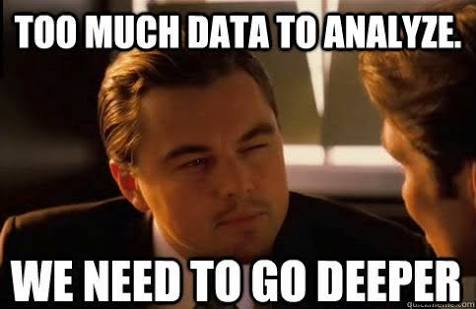

# Now that we have tried most of the ML algorithms, we could try deep learning models now to see if we can increase the accuracy
# Below codes are sourced from https://shrikar.com/deep-learning-with-keras-and-python-for-multiclass-classification/


In [ ]:
# Importing all the necessary libraries
import keras 
import numpy as np
from keras.preprocessing.text import Tokenizer
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, Dropout, Embedding, LSTM, Flatten
from keras.models import Model
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# For a deep learning model we need to know what the input sequence length for our model should be
# Calculate the number of words in the ingredients column and find the maximum value to be used for input sequence

df_train['num_words'] = df_train.question_text.apply(lambda x : len(x.split()))

df_train['num_words'].max()

In [ ]:
# Set number of classes and target variable
num_class = len(np.unique(df_train.target.values))
y = df_train['target'].values

In [ ]:
#Tokenize the input
MAX_LENGTH = 135
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train.question_text.values)
post_seq = tokenizer.texts_to_sequences(df_train.question_text.values)
post_seq_padded = pad_sequences(post_seq, maxlen=MAX_LENGTH)

In [ ]:
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
# Creating a train test split with 30% in testing data set
X_train, X_test, y_train, y_test = train_test_split(post_seq_padded, y, test_size=0.1)

In [ ]:
# Deep Learning Model : Recurrent Neural Networks with LSTM cells

inputs = Input(shape=(MAX_LENGTH, ))
embedding_layer = Embedding(vocab_size,
                            200,
                            input_length=MAX_LENGTH)(inputs)

x = LSTM(72)(embedding_layer)
x = Dense(64, activation='relu')(x)
predictions = Dense(num_class, activation='softmax')(x)
model = Model(inputs=[inputs], outputs=predictions)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

model.summary()

filepath="weights.hdf5"
checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
history = model.fit([X_train], batch_size=5000, y=to_categorical(y_train), verbose=1, validation_split=0.20, 
          shuffle=True, epochs=5, callbacks=[checkpointer])

In [ ]:
#Lets look at prediction accuracy
predicted = model.predict(X_test)
predicted = np.argmax(predicted, axis=1)
accuracy_score(y_test, predicted)